# Background: In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest. Fandango's officials replied that the biased rounding off was caused by a bug in their system rather than being intentional, and they promised to fix the bug as soon as possible.
## Objective: figure out whether there has been any change in Fandango's rating system after Hickey's analysis is to compare the system's characteristics previous and after the analysis. 


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
pd.options.display.max_columns = 100  # Avoid having displayed truncated output

In [4]:
old_data = pd.read_csv('fandango_score_comparison.csv')
new_data = pd.read_csv('movie_ratings_16_17.csv')

In [8]:
old_data.head(2)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5


In [9]:
new_data.head(2)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.8,3.60,4.5,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.4,3.65,2.5,4.15,2.5,3.5,2.5,4.0


Ioslate Usefull columns to use in this analysis.

In [15]:
before_data = old_data[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
after_data = new_data[['movie', 'year', 'fandango']]

## The old data from the initial investigation is biast towards popular movies only.
I will modify the research question to: whether there's any difference between Fandango's ratings for popular movies in 2015 (the time of the initial investigation) and Fandango's ratings for popular movies in 2016 (After fendango claims it fixed the bug). 

In [13]:
#check to see if the sample for the movies collected after the fandango fixed the issue is also of popular movies
after_data[after_data.year==2016].sample(10,random_state=1)

,movie,year,fandango
36,Collide,2016,3.5
75,Ice Age: Collision Course,2016,4.0
125,Now You See Me 2,2016,4.0
171,The Disappointments Room,2016,2.5
92,Kubo and the Two Strings,2016,4.5
134,Pride and Prejudice and Zombies,2016,4.0
40,Deadpool,2016,4.5
115,Money Monster,2016,4.0
204,War Dogs,2016,4.0
111,Miracles from Heaven,2016,4.5


80% of movies from the new dataset have a rating over 4.0

In [16]:
before_data.sample(10,random_state=1)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
98,Get Hard (2015),4.0,3.9,5933,0.1
66,The Gift (2015),4.0,3.7,2680,0.3
53,Hot Pursuit (2015),4.0,3.7,2618,0.3
75,San Andreas (2015),4.5,4.3,9749,0.2
121,The Stanford Prison Experiment (2015),4.0,3.9,51,0.1
74,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,0.2
119,Phoenix (2015),3.5,3.4,70,0.1
128,Mission: Impossible â€“ Rogue Nation (2015),4.5,4.4,8357,0.1
44,Kingsman: The Secret Service (2015),4.5,4.2,15205,0.3
58,Seventh Son (2015),3.5,3.2,1213,0.3


80% of movies from the old dataset have a rating over 4.0

In [23]:
## add a year colum to the dataset extracted from the film name
# before_data['Year'] = before_data['FILM'].str[-5:-1]
## check what movie years are included in this dataset
print('The old dataset: \n',before_data['Year'].value_counts(),'\n')
print('The new dataset: \n',after_data['year'].value_counts())

the old dataset: 
 2015    129
2014     17
Name: Year, dtype: int64 

the new dataset: 
 2016    191
2017     23
Name: year, dtype: int64


In [83]:
## extract the 2015 movies only from the old dataset
data_2015 = before_data[(before_data.Year=='2015') & (before_data.Fandango_Stars>=3.5)].copy()
## extract the 2016 movies only from the new dataset
data_2016 = after_data[(after_data.year == 2016) &(after_data.fandango>=3.5)].copy()

In [84]:
data_2015.describe()

,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
count,118.000000,118.000000,118.000000,118.000000
mean,4.186441,3.937288,3937.872881,0.249153
std,0.442394,0.425430,6799.102073,0.152330
min,3.500000,3.000000,35.000000,0.000000
25%,4.000000,3.600000,169.500000,0.100000
50%,4.000000,4.000000,1303.000000,0.300000
75%,4.500000,4.275000,4239.750000,0.400000
max,5.000000,4.800000,34846.000000,0.500000


In [86]:
data_2016.describe()

,year,fandango
count,171.0,171.000000
mean,2016.0,4.008772
std,0.0,0.377584
min,2016.0,3.500000
25%,2016.0,3.500000
50%,2016.0,4.000000
75%,2016.0,4.500000
max,2016.0,5.000000


## Compare the distribution of my sample for the 2015 movies and 2016 movies with regards to ratings.


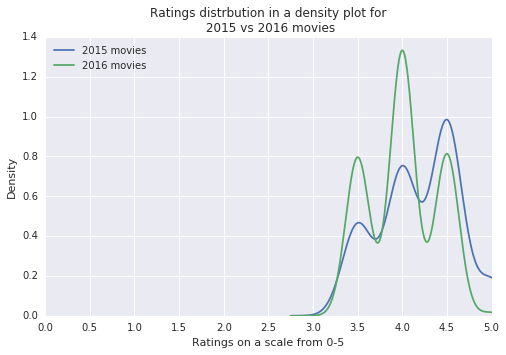

In [87]:
%matplotlib inline

data_2015['Fandango_Stars'].plot.kde(label='2015 movies', legend=True,figsize=(8,5))
data_2016['fandango'].plot.kde(label='2016 movies',legend=True)
plt.title('Ratings distrbution in a density plot for\n 2015 vs 2016 movies')
plt.xlabel('Ratings on a scale from 0-5')
plt.xticks(np.arange(0,5.5,0.5))
plt.xlim(0,5)
plt.show()

In [88]:
# find the frequency distribution as [ercentages because there is a different numbe of sample units in both samples]
print('Distribution for 2015 movies:\n',(data_2015['Fandango_Stars'].value_counts(normalize=True)*100).sort_index())

print('\nDistribution for 2016 movies:\n',(data_2016['fandango'].value_counts(normalize=True)*100).sort_index())

Distribution for 2015 movies:
 3.5    19.491525
4.0    31.355932
4.5    41.525424
5.0     7.627119
Name: Fandango_Stars, dtype: float64

Distribution for 2016 movies:
 3.5    26.900585
4.0    45.029240
4.5    27.485380
5.0     0.584795
Name: fandango, dtype: float64


In [115]:
mean_2015 =data_2015['Fandango_Stars'].mean()
mean_2016 =data_2016['fandango'].mean()

median_2015 = data_2015['Fandango_Stars'].median()
median_2016 = data_2016['fandango'].median()

mode_2015 = data_2015['Fandango_Stars'].mode()
mode_2016 = data_2016['fandango'].mode()

summary = pd.DataFrame()
summary[2015]= (mean_2015,median_2015,mode_2015)
summary[2016]= (mean_2016,median_2016,mode_2016)
summary.index= ('Mean','Median','Mode')

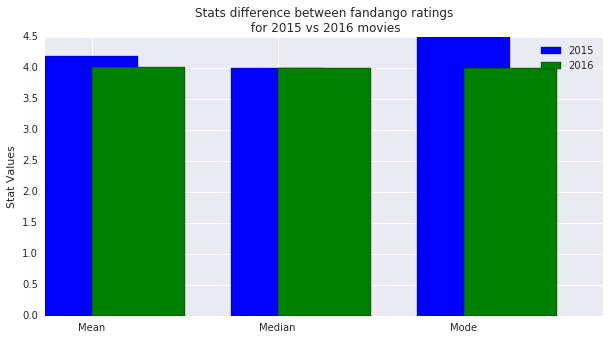

In [137]:
summary[2015].plot.bar(color='b',align='center' ,label='2015', legend=True, figsize=(10,4.5))
summary[2016].plot.bar(color='g',align='edge' ,label='2016', legend=True,rot=0)
plt.title('Stats difference between fandango ratings\n for 2015 vs 2016 movies')
plt.legend()
plt.ylabel('Stat Values')





The mean of movies released in 2016 is lower and the mode is lower while the median is the same as compared to 2015 movies.
This suggests that the popular movies in 2016 have lower rating values compared to 2016 movies with less tendancy for rounding.